In [67]:
# Import packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

import Orthoscripts

#### Import data

In [64]:
# Asterias rubens
Astrub = Orthoscripts.readBED("Data/Genelists/Asterias.rubens.genelist.bed")

# Holothuria leucospilota
Holleu = Orthoscripts.readBED("Data/Genelists/Holothuria.leucospilota.genelist.bed")

# Paracentrotus livides
Parliv = Orthoscripts.readBED("Data/Genelists/Paracentrotus.lividus.genelist.bed")

# Branchiostoma lanceolatum
Bralan = Orthoscripts.readBED("Data/Genelists/Branchiostoma.lanceolatum.genelist.bed")

# Branchiostoma floridae
Braflo = np.loadtxt("Braflo_info_ra.txt", dtype = "str")
Braflo = pd.DataFrame(Braflo, columns = ['Name', 'Chromosome', 'Start', 'End', 'Dot'])

# Marthasterias glacialis
Margla = Orthoscripts.readBED("Data/Genelists/Marthasterias.glacialis.genelist.bed")

# Pecten maximus
Pecmax = Orthoscripts.readBED("Data/Genelists/Pecten.maximus.genelist.bed")

# Stichopus chloronotus
Stichl = Orthoscripts.readBED("Data/Genelists/Stichopus.chloronotus.genelist.bed")

# Ancestor
Ancestor = Holleu

In [66]:
# Import orthologs
Astrub_Holleu = np.loadtxt("Data/Orthologs/Asterias.rubens+Holothuria.leucospilota.txt", dtype = "str")

Astrub_Parliv = np.loadtxt("Data/Orthologs/Asterias.rubens+Parliv.lividus.txt", dtype = "str")

Holleu_Parliv = np.loadtxt("Data/Orthologs/Holothuria.leucospilota+Paracentrotus.lividus.txt", dtype = "str")

Margla_Bralan = np.loadtxt("Data/Orthologs/Marthasterias.glacialis+Branchiostoma.lanceolatum.txt", dtype = "str")

Margla_Pecmax = np.loadtxt("Data/Orthologs/Marthasterias.glacialis+Pecten.maximus.txt", dtype = "str")

Margla_Stichl = np.loadtxt("Data/Orthologs/Marthasterias.glacialis+Stichopus.chloronotus.txt", dtype = "str")

Pecmax_Bralan = np.loadtxt("Data/Orthologs/Pecten.maximus+Branchiostoma.lanceolatum.txt", dtype = "str")

Stichl_Bralan = np.loadtxt("Data/Orthologs/Stichopus.chloronotus+Branchiostoma.lanceolatum.txt", dtype = "str")

Stichl_Pecmax = np.loadtxt("Data/Orthologs/Stichopus.chloronotus+Pecten.maximus.txt", dtype = "str")

Pecmax_Holleu = np.loadtxt("orthology_pipeline/orthologs/Pecmax+Holleu_sensitive.txt", dtype = "str")

Holleu_Bralan = np.loadtxt("orthology_pipeline/orthologs/Holleu+Bralan_sensitive.txt", dtype = "str")

Pecmax_Bralan = np.loadtxt("orthology_pipeline/orthologs/Pecmax+Bralan_sensitive.txt", dtype = "str")

FileNotFoundError: Data/Orthologs/Asterias.rubens+Parliv.lividus.txt not found.

#### Sorting out the data

In [49]:
# Asterias data: removing non-chromosomal values
Astrub = Astrub.loc[Astrub['Chromosome'].str.contains('chr')]
# Branchiostoma floridae
Braflo = np.loadtxt("Braflo_info_ra.txt", dtype = "str")
Braflo = pd.DataFrame(Braflo, columns = ['Name', 'Chromosome', 'Start', 'End', 'Dot'])
# Paracentrotus data: select chromosomal scaffolds
Parliv_ortho = Parliv.groupby('Chromosome').size()
Parliv_ortho = Parliv_ortho.reset_index()

Parliv_ortho.columns = ['Chromosome', 'Count']
Parliv_ortho = Parliv_ortho.loc[Parliv_ortho['Count'] >= 100]

scaffolds = Parliv_ortho.Chromosome.tolist() # Remove all values from non-chromosome scaffolds
Parliv = Parliv.loc[Parliv['Chromosome'].isin(scaffolds)]

# Branchiostoma data: remove suffix
Bralan = Bralan.loc[Bralan['Chromosome'].str.contains('BFL_')]

# Pecten data: Calculate number of genes on each scaffold
Pecmax_ortho = Pecmax.groupby('Chromosome').size()
Pecmax_ortho = Pecmax_ortho.reset_index()

Pecmax_ortho.columns = ['Chromosome', 'Count']
Pecmax_ortho = Pecmax_ortho.loc[Pecmax_ortho['Count'] >= 100]

scaffolds = Pecmax_ortho.Chromosome.tolist() # Remove all values from non-chromosome scaffolds
Pecmax = Pecmax.loc[Pecmax['Chromosome'].isin(scaffolds)]

# MB orthologies: remove prefixes on gene names
Margla_Bralan = pd.DataFrame(Margla_Bralan, columns = ['Code', 'A', 'P'])
Margla_Bralan['P'] = Margla_Bralan['P'].str.removeprefix('Parliv_')
Margla_Bralan = Margla_Bralan.to_numpy()

# MarBra orthologies: remove suffix
Margla_Bralan = pd.DataFrame(Margla_Bralan, columns = ['Code', 'M', 'B'])
Margla_Bralan['M'] = Margla_Bralan['M'].str.removesuffix('.1')
Margla_Bralan = Margla_Bralan.to_numpy()

# MS orthologies: remove suffix
Margla_Stichl = pd.DataFrame(Margla_Stichl, columns = ['Code', 'M', 'S'])
Margla_Stichl['M'] = Margla_Stichl['M'].str.removesuffix('.1')
Margla_Stichl['S'] = Margla_Stichl['S'].str.removesuffix('.1')
Margla_Stichl = Margla_Stichl.to_numpy()

# MP orthologies: remove suffix
Margla_Pecmax = pd.DataFrame(Margla_Pecmax, columns = ['Code', 'M', 'P'])
Margla_Pecmax['M'] = Margla_Pecmax['M'].str.removesuffix('.1')
Margla_Pecmax = Margla_Pecmax.to_numpy()

# AncBra orthology: 
Holleu_Bralan = pd.DataFrame(Holleu_Bralan, columns = ['Code', 'A', 'B'])
Holleu_Bralan['B'] = Holleu_Bralan['B'].str.rsplit('_').str.get(0)
Holleu_Bralan = Holleu_Bralan.to_numpy()

-----

In [7]:
PecAnc_data = Orthoscripts.orthofy(Pecten, Ancestor, PecAnc_orthology)

PecAnc_data

,speciesA,speciesB,Orthologs,p-Values,Results
8,HiC_scaffold_1,Hchr17,301,0.000000e+00,True
40,HiC_scaffold_10,Hchr4,333,0.000000e+00,True
52,HiC_scaffold_11,Hchr15,302,0.000000e+00,True
78,HiC_scaffold_12,Hchr18,212,1.993513e-276,True
92,HiC_scaffold_13,Hchr1,16,3.323744e-02,True
114,HiC_scaffold_13,Hchr9,99,3.652000e-85,True
117,HiC_scaffold_1391,Hchr1,2,2.763389e-02,True
119,HiC_scaffold_14,Hchr10,94,3.453928e-109,True
158,HiC_scaffold_15,Hchr5,380,0.000000e+00,True
165,HiC_scaffold_16,Hchr11,184,1.482196e-161,True


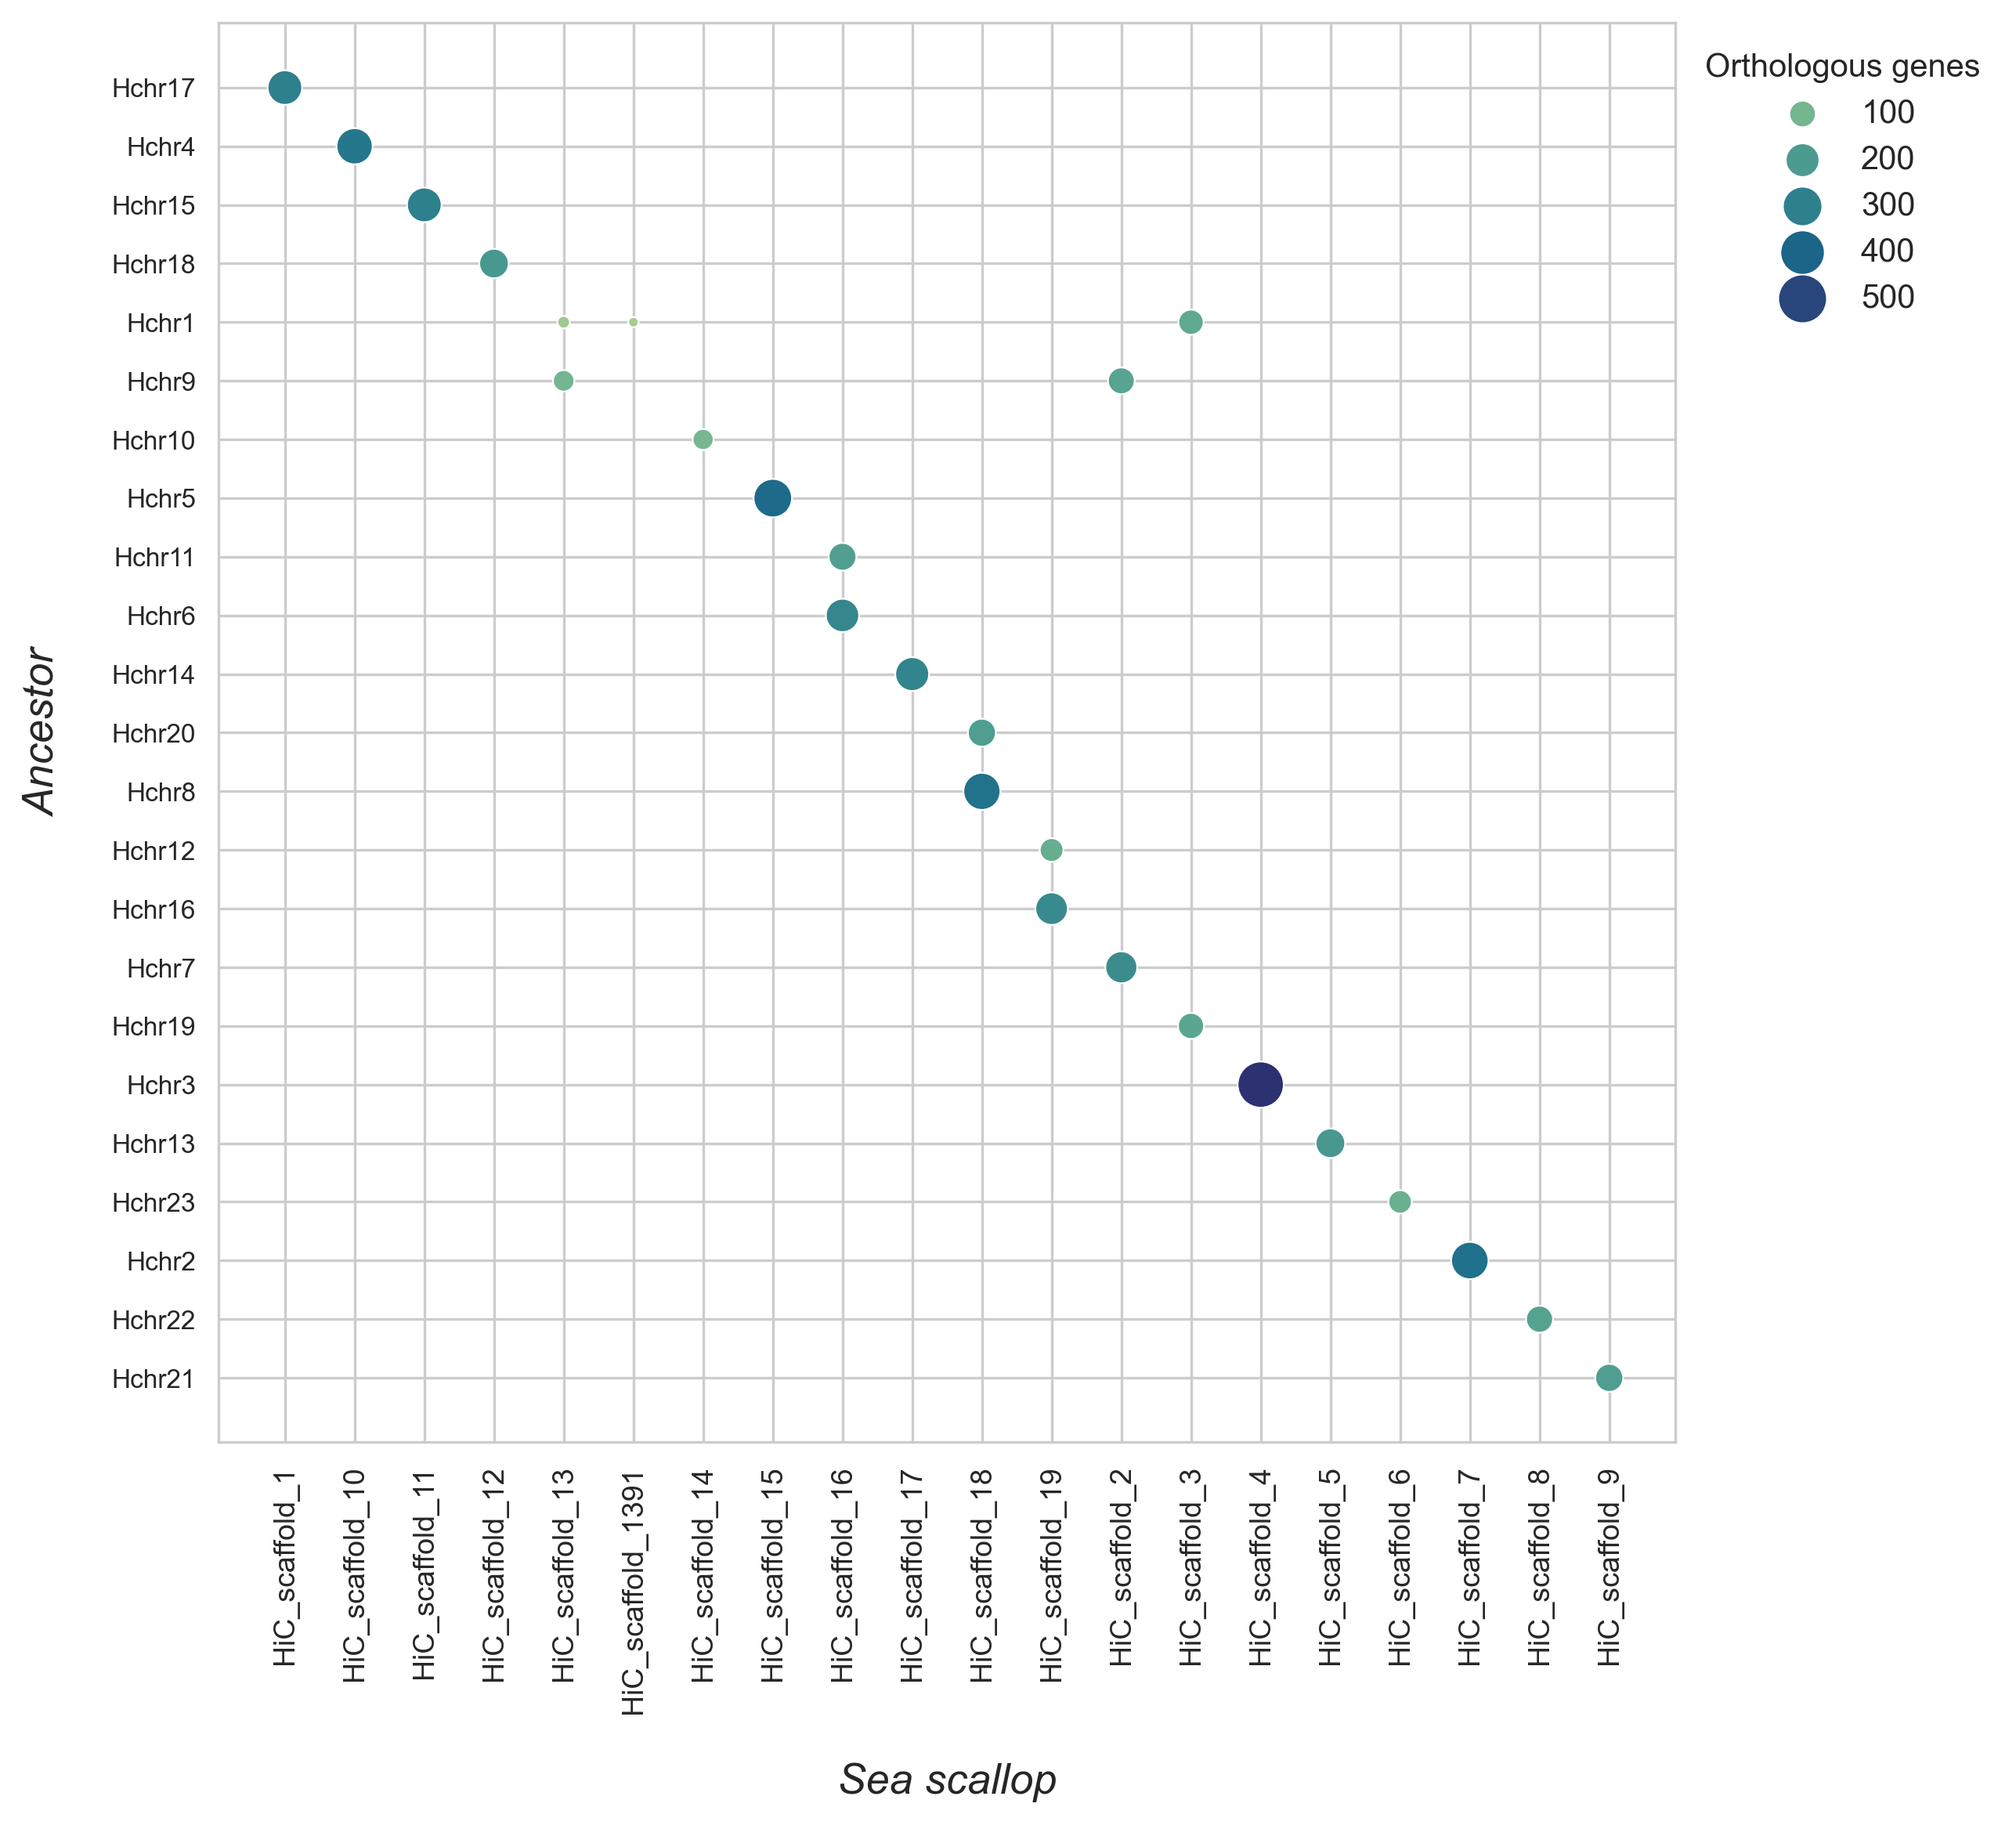

In [10]:
Orthoscripts.orthoplot(PecAnc_data, 'Sea scallop', 'Ancestor')

In [11]:
Orthoscripts.orthoChr(PecAnc_data)

Fusions: 3
['Hchr1', 'Hchr9']
Fissions: 6
['HiC_scaffold_13', 'HiC_scaffold_16', 'HiC_scaffold_18', 'HiC_scaffold_19', 'HiC_scaffold_2', 'HiC_scaffold_3']


In [65]:
AncBra_data = Orthoscripts.orthofy(Ancestor, Bralan, Holleu_Bralan)

NameError: name 'Holleu_Bralan' is not defined

In [52]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(AncBra_data)

    speciesA speciesB  Orthologs
0      Hchr1    BFL_1         14
1      Hchr1   BFL_10         11
2      Hchr1   BFL_11          9
3      Hchr1   BFL_12         11
4      Hchr1   BFL_13         12
5      Hchr1   BFL_14         15
6      Hchr1   BFL_15          8
7      Hchr1   BFL_16          8
8      Hchr1   BFL_17         14
9      Hchr1   BFL_18          4
10     Hchr1   BFL_19          8
11     Hchr1    BFL_2         16
12     Hchr1    BFL_3         14
13     Hchr1    BFL_4         10
14     Hchr1    BFL_5          5
15     Hchr1    BFL_6          7
16     Hchr1    BFL_7          4
17     Hchr1    BFL_8         15
18     Hchr1    BFL_9         16
19    Hchr10    BFL_1          9
20    Hchr10   BFL_10          7
21    Hchr10   BFL_11         11
22    Hchr10   BFL_12          3
23    Hchr10   BFL_13          9
24    Hchr10   BFL_14          6
25    Hchr10   BFL_15         10
26    Hchr10   BFL_16          4
27    Hchr10   BFL_17          7
28    Hchr10   BFL_18          6
29    Hchr